In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
# Here it displays the top 5 movies records
netflix_data = pd.read_csv("netflix_titles_2021.csv")
netflix_data

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
netflix_data.shape

(8807, 12)

In [6]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
netflix_data.duplicated().sum()

0

In [8]:
netflix_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
netflix_data = netflix_data.dropna()
netflix_data.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdom  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   
24                                              India  September 21, 2021   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
8   A talented batch of amateur bakers face off in...  
9   A woman adjusting to life after a loss contend...  
12  After most of her family is murdered in a terr...  
24  When the father of the man she loves insists t...

In [10]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['day_added'] = netflix_data['date_added'].dt.day
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added']=netflix_data['date_added'].dt.month

In [11]:
netflix_data['year_added'].astype(int)
netflix_data['day_added'].astype(int)

7       24
8       24
9       24
12      23
24      21
        ..
8801     9
8802    20
8804     1
8805    11
8806     2
Name: day_added, Length: 5332, dtype: int64

In [12]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
 12  day_added     5332 non-null   int64         
 13  year_added    5332 non-null   int64         
 14  month_added   5332 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

In [13]:
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
year_added      0
month_added     0
dtype: int64

In [14]:
netflix_data.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
8                                      United Kingdom 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   
24                                              India 2021-09-21   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  day_added  year_added  \
7   On a photo shoot in Ghana, an American model s...         24        2021   
8   A talented batch of amateur bakers face off in...         24        2021   
9   A woman adjusting to life after a loss contend...         24        2021   
12  After most of her family is murdered in a terr...         23        2021   
24  When the father of the man she loves insists t...         21        2021   

    month_added  
7             9  
8             9  
9             9  
12            9  
24            9

In [15]:
del netflix_data['date_added']
netflix_data.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country  release_year rating  \
7   United States, Ghana, Burkina Faso, United Kin...          1993  TV-MA   
8                                      United Kingdom          2021  TV-14   
9                                       United States          2021  PG-13   
12                            Germany, Czech Republic          2021  TV-MA   
24                                              India          1998  TV-14   

     duration                                         listed_in  \
7     125 min  Dramas, Independent Movies, International Movies   
8   9 Seasons                      British TV Shows, Reality TV   
9     104 min                                  Comedies, Dramas   
12    127 min                      Dramas, International Movies   
24    166 min   Comedies, International Movies, Romantic Movies   

                                          description  day_added  year_added  \
7   On a photo shoot in Ghana, an American model s...         24        2021   
8   A talented batch of amateur bakers face off in...         24        2021   
9   A woman adjusting to life after a loss contend...         24        2021   
12  After most of her family is murdered in a terr...         23        2021   
24  When the father of the man she loves insists t...         21        2021   

    month_added  
7             9  
8             9  
9             9  
12            9  
24            9

In [16]:
netflix_data.to_csv('netflix_data.csv')

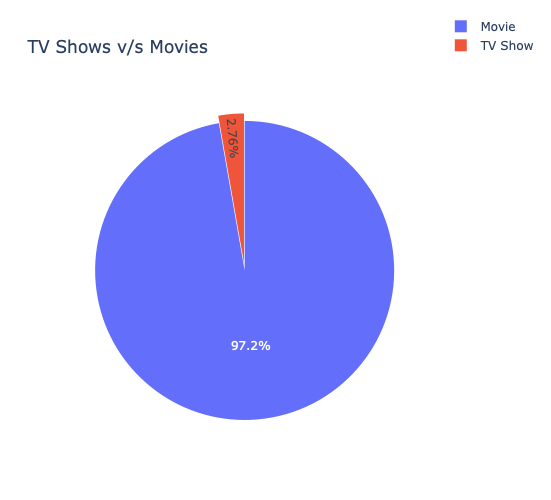

In [17]:
group_netflix=netflix_data['type'].value_counts()
trace=go.Pie(labels=group_netflix.index,values=group_netflix.values,pull=[0.05])
layout = go.Layout(title="TV Shows v/s Movies", height=400, legend=dict(x=1.1, y=1.3))

fig = go.Figure(data=[trace],layout=layout)

fig.update_layout(height=500,width=700)
fig.show()

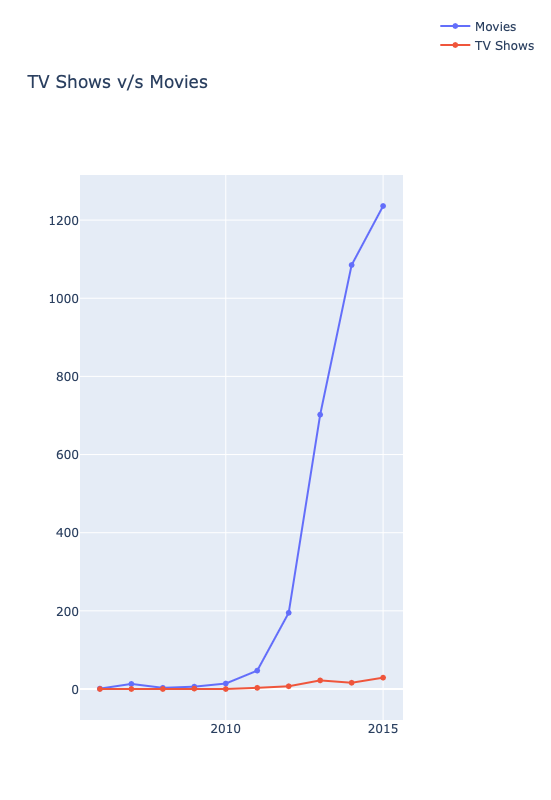

In [18]:
movie_released=[]
tvshows_released=[]
for i in range(2010,2020):
    h=netflix_data.loc[(netflix_data['type']=='Movie') & (netflix_data.year_added==i)] 
    g=netflix_data.loc[(netflix_data['type']=='TV Show') & (netflix_data.year_added==i)] 
    movie_released.append(len(h))
    tvshows_released.append(len(g))
trace1 = go.Scatter(x=[i for i in range(2006,2020)],y=movie_released,mode='lines+markers',name='Movies')
trace2=go.Scatter(x=[i for i in range(2006,2020)],y=tvshows_released,mode='lines+markers',name='TV Shows')
data=[trace1,trace2]
fig = go.Figure(data, layout=layout)
fig.update_layout(height=800,width=1200)
fig.show()

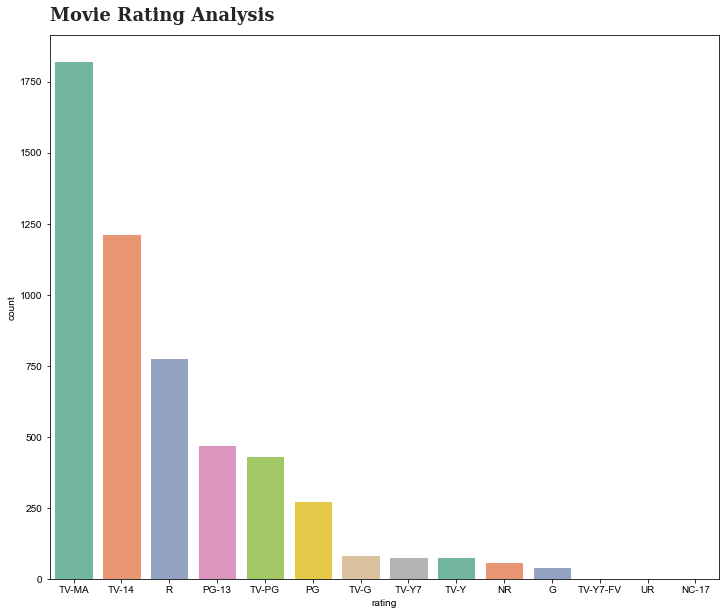

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12, 10))
sns.set(style= "darkgrid")
fig.text(0.125,0.9,'Movie Rating Analysis', fontfamily='serif',fontsize=18, fontweight='bold')
ax = sns.countplot(x= "rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

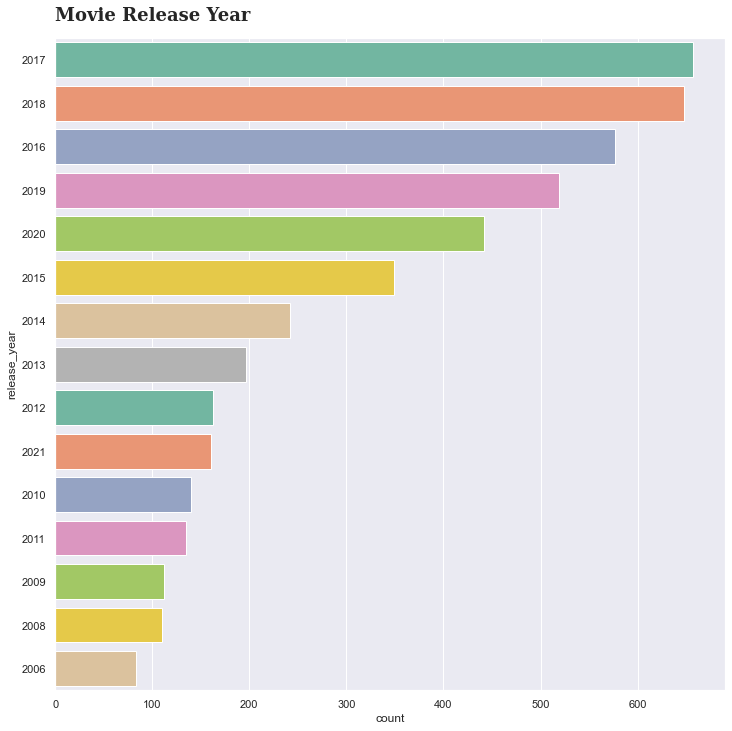

In [20]:
fig, ax = plt.subplots(1,1,figsize=(12, 12))
sns.set(style="darkgrid")
fig.text(0.125,0.9,'Movie Release Year', fontfamily='serif',fontsize=18, fontweight='bold')
ax = sns.countplot(y="release_year", data=netflix_data, palette="Set2", order=netflix_data['release_year'].value_counts().index[0:15])

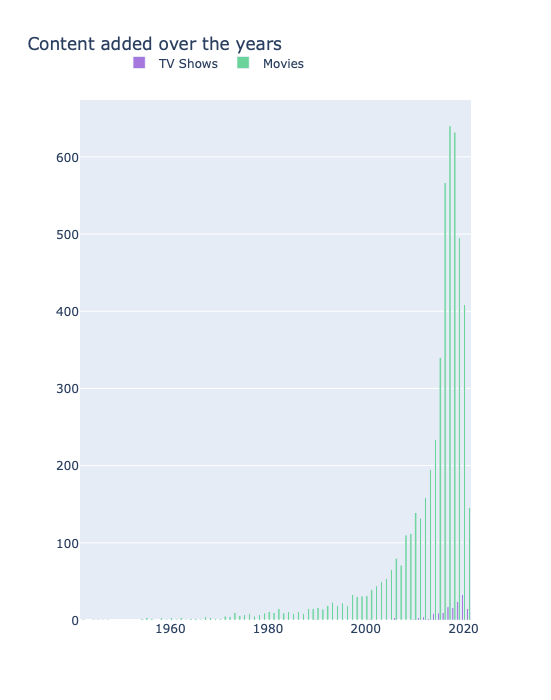

In [21]:
d1 = netflix_data[netflix_data["type"] == "TV Show"]
d2 = netflix_data[netflix_data["type"] == "Movie"]
release_year_data1 = d1['release_year'].value_counts().reset_index()
release_year_data1= release_year_data1.rename(columns = {'release_year' : "count", "index" : 'release_year'})
release_year_data1['percent'] = release_year_data1['count'].apply(lambda x : 100*x/sum(release_year_data1['count']))
release_year_data1 = release_year_data1.sort_values('release_year')

release_year_data2 = d2['release_year'].value_counts().reset_index()
release_year_data2 = release_year_data2.rename(columns = {'release_year' : "count", "index" : 'release_year'})
release_year_data2['percent'] = release_year_data2['count'].apply(lambda x : 100*x/sum(release_year_data2['count']))
release_year_data2 =release_year_data2.sort_values('release_year')
trace1 = go.Bar(x=release_year_data1['release_year'], y=release_year_data1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=release_year_data2['release_year'], y=release_year_data2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.update_layout(height=700,width=2000)
fig.show()

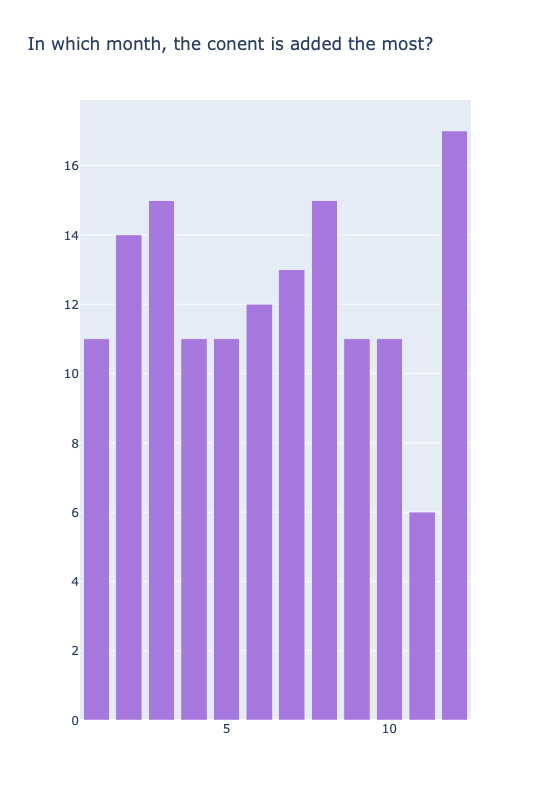

In [22]:
release_month_data = d1['month_added'].value_counts().reset_index()
release_month_data = release_month_data.rename(columns = {'month_added' : "count", "index" : 'month_added'})
release_month_data['percent'] = release_month_data['count'].apply(lambda x : 100*x/sum(release_month_data['count']))
release_month_data = release_month_data.sort_values('month_added')
trace1 = go.Bar(x=release_month_data['month_added'], y=release_month_data["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.update_layout(height=800,width=1500)
fig.show()

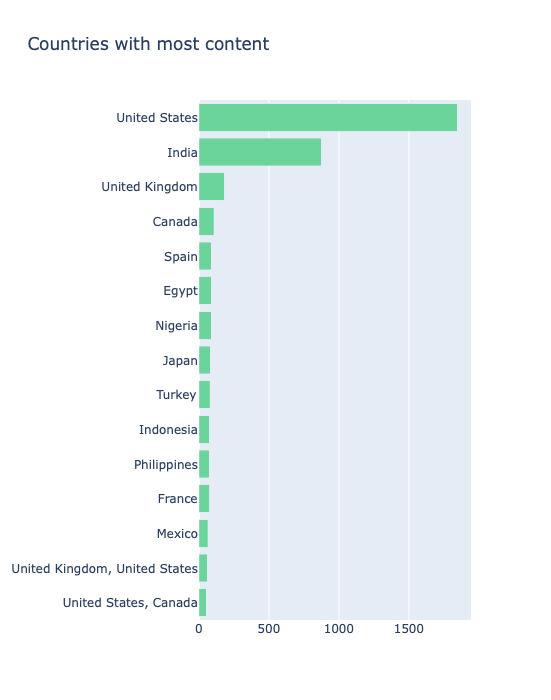

In [23]:
top_countries=netflix_data.country.value_counts()
top_countries=top_countries[:15][::-1]
trace=go.Bar(x=top_countries.values,y=top_countries[:15].index,orientation='h',name='',marker=dict(color='#6ad49b'))
data = [trace]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data, layout=layout)
fig.show()

In [24]:
new_order = pd.DataFrame(netflix_data.groupby('rating')['show_id'].sum().sort_values(ascending=False).reset_index())
rating_order = list(new_order['rating'])

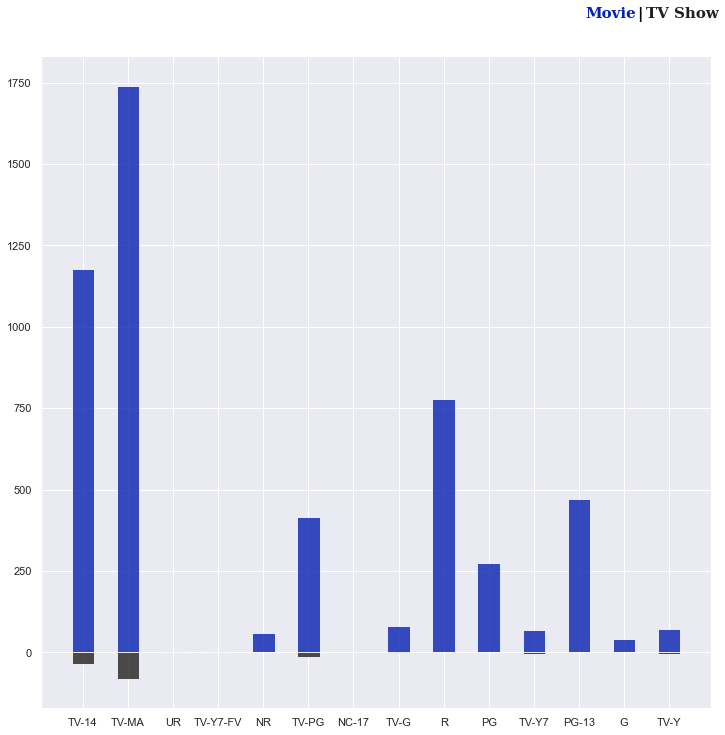

In [25]:
movie_rating = netflix_data.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
movie = movie_rating.loc['Movie']
tv = - movie_rating.loc['TV Show']
fig, ax = plt.subplots(1,1, figsize=(12, 12))
ax.bar(movie.index, movie, width=0.5, color='#0721B2', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#0721B2')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
plt.show()

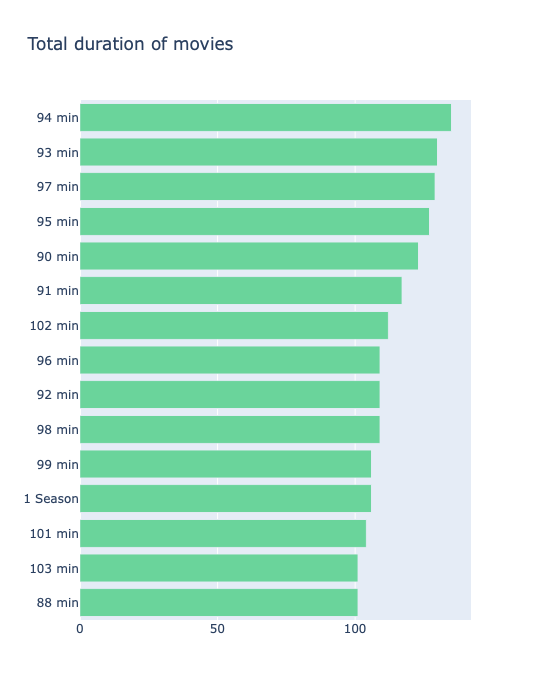

In [26]:
total_duration=netflix_data['duration'].value_counts()
total_duration=total_duration[:15][::-1]
trace=go.Bar(x=total_duration.values,y=total_duration[:15].index,orientation='h',name='',marker=dict(color='#6ad49b'))
data = [trace]
layout = go.Layout(title="Total duration of movies", height=700, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data, layout=layout)
fig.show()

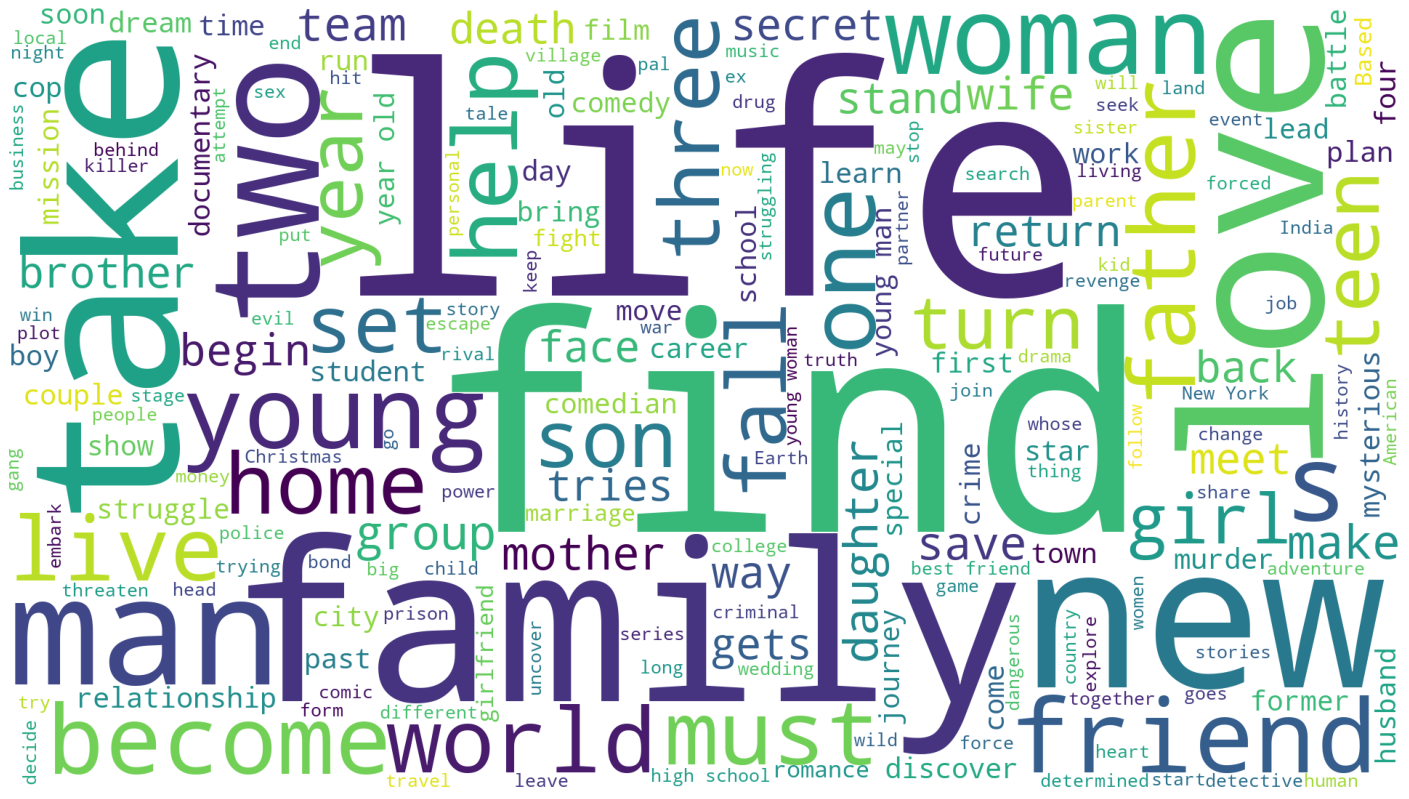

In [27]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix_data.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('description.png')
plt.show()

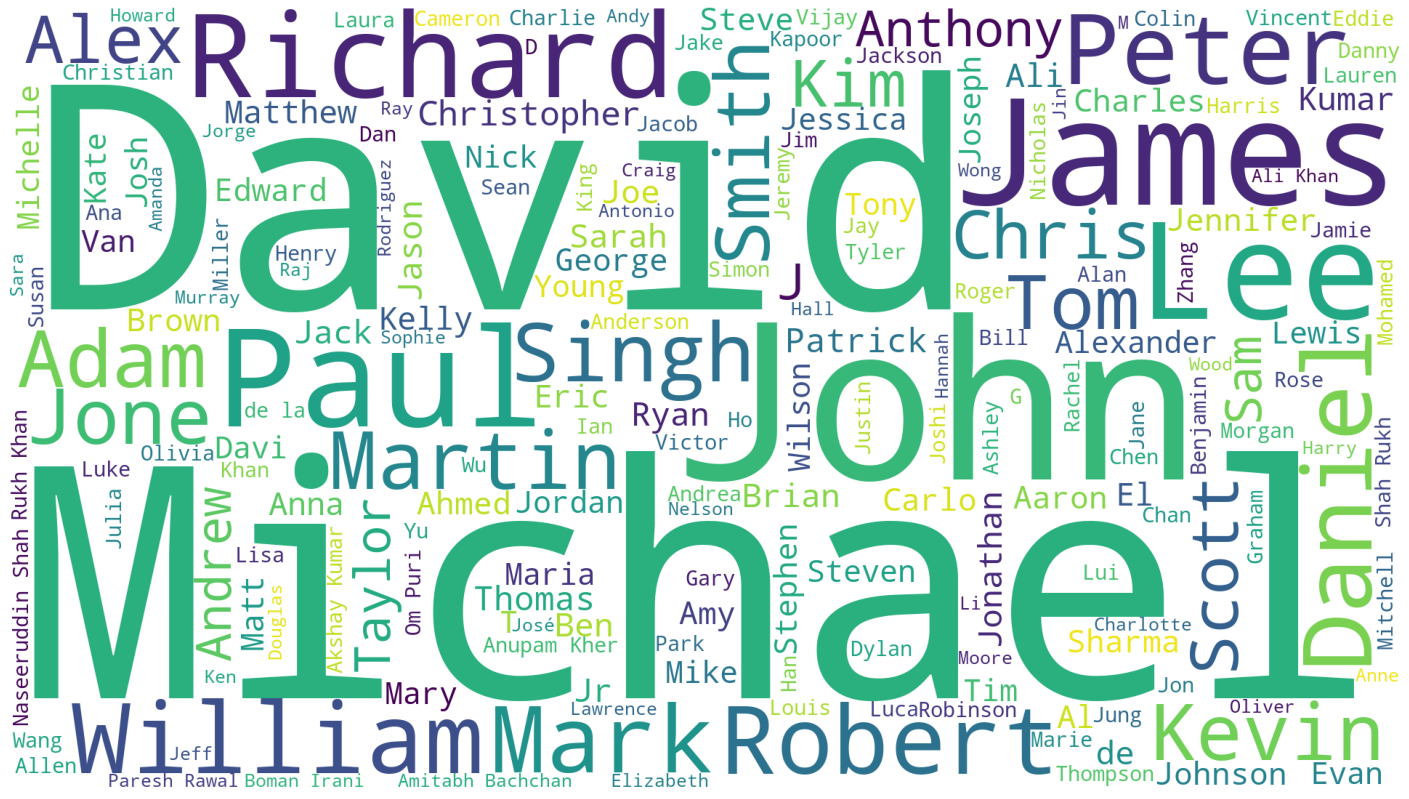

In [28]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix_data.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()